In [1]:
#parsing of Matthew in order to make a proof of concept for a graded level reader in this book
import pandas as pd
import numpy as np
from re import search 

In [2]:
#Get data set into the python
genToDeu = pd.read_excel('TOTHT Gen-Deu.xlsx', header = None)
IsaToMal = pd.read_excel('TOTHT Isa-Mal.xlsx', header = None)
JobToSng = pd.read_excel('TOTHT Job-Sng.xlsx', header = None)
JosToEst = pd.read_excel('TOTHT Jos-Est.xlsx', header = None)
torah = np.array(genToDeu)
IsaToMal = np.array(IsaToMal)
JobToSng = np.array(JobToSng)
JosToEst = np.array(JosToEst)

In [3]:
# x = torah + IsaToMal + JobToSng + JosToEst
OT = np.concatenate((torah, IsaToMal,JobToSng,JosToEst))

In [4]:
print(OT[0:100])

[['Gen.1.1-01' 'Gen.1.1-01' 'בְּרֵאשִׁית' 'בְּ/רֵאשִׁ֖ית' 'HR/Ncfsa'
  'H9003=ב=in/H7225=רֵאשִׁית=first_§1_beginning']
 ['Gen.1.1-02' 'Gen.1.1-02' 'בָּרָא' 'בָּרָ֣א' 'HVqp3ms'
  'H1254a=בָּרָא=to create']
 ['Gen.1.1-03' 'Gen.1.1-03' 'אֱלֹהִים' 'אֱלֹהִ֑ים' 'HNcmpa'
  'H0430=אֱלֹהִים=God_§God@Gen.1.1']
 ['Gen.1.1-04' 'Gen.1.1-04' 'אֵת' 'אֵ֥ת' 'HTo' 'H0853=אֵת=obj.']
 ['Gen.1.1-05' 'Gen.1.1-05' 'הַשָּׁמַיִם' 'הַ/שָּׁמַ֖יִם' 'HTd/Ncmpa'
  'H9009=ה=the/H8064=שָׁמַיִם=heaven']
 ['Gen.1.1-06' 'Gen.1.1-06' 'וְאֵת' 'וְ/אֵ֥ת' 'HC/To'
  'H9002=ו=and/H0853=אֵת=obj.']
 ['Gen.1.1-07' 'Gen.1.1-07' 'הָאָרֶץ' 'הָ/אָֽרֶץ/׃' 'HTd/Ncbsa'
  'H9009=ה=the/H0776=אֶ֫רֶץ=land_§3_planet/H9016=׃=verseEnd']
 ['Gen.1.2-01' 'Gen.1.2-01' 'וְהָאָרֶץ' 'וְ/הָ/אָ֗רֶץ' 'HC/Td/Ncbsa'
  'H9002=ו=and/H9009=ה=the/H0776=אֶ֫רֶץ=land_§3_planet']
 ['Gen.1.2-02' 'Gen.1.2-02' 'הָיְתָה' 'הָיְתָ֥ה' 'HVqp3fs'
  'H1961=הָיָה=to be']
 ['Gen.1.2-03' 'Gen.1.2-03' 'תֹהוּ' 'תֹ֙הוּ֙' 'HNcbsa'
  'H8414=תֹּ֫הוּ=formlessness']
 ['Gen.1.2-04' 'G

In [87]:
pd.DataFrame(OT).to_csv("dataTest.csv")

In [48]:
#create the frequency using the conjugated words
print(OT[0][2]) #this is the word

freq ={}
print(len(OT))
for i in range(0,len(OT)):
    if (OT[i][2] in freq):
        freq[OT[i][2]] +=1
    else:
        freq[OT[i][2]] = 1      
#creates a frequency list
freqSorted = sorted(freq.items(), key=lambda x: x[1], reverse = True) 

בְּרֵאשִׁית
306887


In [70]:
#create a freqency list using the roots
print(OT[0][5]) #this is the word
print(OT[0][3])

def breakEquals(text):
    return text.split("=")

def breakSlash(text):
    if "/" in text:
        return text.split("/")
    else:
        return [text]
        
freq ={}
print(len(OT))
for i in range(0,len(OT)):
    try:
        words = breakSlash(OT[i][3])
        for word in words:
            if (word in freq):
                freq[word] +=1
            else:
                freq[word] = 1
#         phrase = OT[i][5]
#         phrase = breakSlash(phrase)
#         for word in phrase:
#             arr = breakEquals(word)
#             try:
#                 if (arr[1] in freq):
#                     freq[arr[1]] +=1
#                 else:
#                     freq[arr[1]] = 1
#             except:
#                 continue
    except:
        print(,"word issue:", OT[i][3])
        
#creates a frequency list
freqSorted = sorted(freq.items(), key=lambda x: x[1], reverse = True) 

H9003=ב=in/H7225=רֵאשִׁית=first_§1_beginning
בְּ/רֵאשִׁ֖ית
306887
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [ ]:
print(freqSorted)

[('־', 42528), ('וְ', 23638), ('׃', 23303), ('הַ', 16181), ('וַ', 14795), ('אֶת', 8218), ('לְ', 7992), ('וּ', 7970), ('וֹ', 7136), ('הָ', 6840), ('בְּ', 6535), ('י', 5894), ('מִ', 3970), ('ו', 3749), ('אֶל', 3655), ('ךָ', 3593), ('ם', 3526), ('עַל', 3462), ('כָּל', 2667), ('לָ', 2589), ('לִ', 2557), ('בַּ', 2551), ('לַ', 2428), ('׀', 2273), ('ס', 1990), ('מֵ', 1812), ('הּ', 1767), ('ךְ', 1650), ('כָל', 1617), ('בְ', 1546), ('ה', 1533), ('נוּ', 1433), ('כִּֽי', 1428), ('אֲשֶׁר', 1330), ('לֹ֣א', 1210), ('בֶּן', 1203), ('וָ', 1199), ('אֲשֶׁ֣ר', 1170), ('פ', 1169), ('אֲשֶׁ֥ר', 1156), ('לֹ֥א', 1104), ('לֹא', 1102), ('בִּ', 1098), ('לֹֽא', 1042), ('כְּ', 1004), ('נִי', 982), ('וַֽ', 951), ('הוּ', 945), ('עַד', 944), ('לֵ', 942), ('אִם', 931), ('כַּ', 878), ('יְהוָ֖ה', 876), ('בָּ', 870), ('כִּ֣י', 821), ('מִן', 801), ('יְהוָ֔ה', 732), ('א', 712), ('בַ', 667), ('ךָ֖', 658), ('הָֽ', 651), ('אַל', 642), ('ךָ֙', 627), ('וֹ֙', 606), ('יְהוָֽה', 602), ('הַֽ', 598), ('י֙', 591), ('אֲשֶׁ֨ר', 572), (

In [60]:
print(OT[0][3])
print(freqSorted[0:5])

בְּ/רֵאשִׁ֖ית
[('אֶת', 6714), ('יְהוָה', 5654), ('אֲשֶׁר', 4807), ('כִּי', 4347), ('עַל', 3550)]


In [39]:
verseNo = {}
for row in OT:
    try:
        if (row[0][:-3] in verseNo):
            verseNo[row[0][:-3]] += 1
        else:
            verseNo[row[0][:-3]] = 1 
    except:
        continue #print("error")

    

In [69]:
#Create my verse ranking
#     try:
#         words = breakSlash(OT[i][3])
#         for word in words:
#             if (word in freq):
#                 freq[word] +=1
#             else:
#                 freq[word] = 1

def breakSlash(text):
    if "/" in text:
        return text.split("/")
    else:
        return [text]
        
rank = {}
frontIdx = -1
endIdx = 0
for key,value in verseNo.items():#for each verse no query       
    #print(key,value)
    endIdx = frontIdx + value
    frontIdx += 1
    #print(frontIdx,endIdx)
    lowest = 1234567
    for i in range(frontIdx,endIdx+1):
        #try:
        words = breakSlash(OT[i][3])
        for word in words:
            temp = freq[word]
            if (temp < lowest):
                lowest =  temp
#         except:
#             continue
        #code uses conjugations does not work as well
#         temp = freq[OT[i][2]]
#         if (temp < lowest):
#             lowest = temp
            #code below uses the root words and not the conjugations
#         try:
#             #splitStr = OT[i][3].split("/")
#             for no in splitStr:# parsing the parsing
#                 splits = no.split("=")
#                 temp = freq[splits[0]]
#             #print(splitStr[-1])
#                 if(temp < lowest): #
#                     lowest = temp
#         except:
#             try:
#                 var = OT[i][3]
#                 for no in var:
#                     splits = no.split("=")
#                     temp = freq[splits[0]]
#                     if(temp < lowest):
#                         lowest = temp
#             except:
#                 continue
    rank[key] = lowest
    frontIdx = endIdx
print(rank)

TypeError: argument of type 'float' is not iterable

In [68]:
#removed sorted becaus e it is writing on itself
#rankSorted = sorted(rank.items(), key=lambda x: x[1], reverse = True) 
#rankSorted[0:100]
# i = 0
# for key,value in rank:
#     print(key,value)
#     if i == 1000:
#         break
rankSorted = {key:val for key, val in rank.items() if val != 1234567}
rankSorted = sorted(rankSorted.items(), key=lambda x: x[1], reverse = True)
print(rankSorted)

[('1Ki.12.33-1', 1042), ('Deu.8.2-2', 931), ('Num.26.9-0', 602), ('Jer.17.13-0', 602), ('1Sa.2.3-1', 591), ('2Sa.1.16-0', 572), ('Num.32.7-0', 555), ('2Ch.13.19-1', 521), ('Ezr.4.7-0', 521), ('2Sa.3.15-1', 419), ('2Sa.19.32-1', 411), ('Jos.9.7-0', 398), ('1Sa.10.21-0', 384), ('2Sa.5.8-1', 384), ('Gen.8.17-1', 279), ('Lev.11.21-1', 279), ('Num.14.36-0', 279), ('Isa.12.5-0', 279), ('Ezk.37.16-1', 260), ('1Ki.7.45-1', 253), ('Job.1.10-0', 252), ('Isa.66.17-0', 240), ('Jer.2.3-0', 240), ('Jer.15.9-0', 240), ('Jer.29.23-1', 240), ('Zec.1.4-1', 240), ('Jer.46.11-0', 228), ('2Ki.7.12-2', 222), ('Jos.3.4-0', 210), ('2Ch.29.28-0', 206), ('Jer.39.16-1', 177), ('Ezk.24.2-0', 177), ('1Ch.14.1-0', 177), ('1Sa.23.5-0', 172), ('Ezk.25.7-0', 163), ('Ezk.35.9-0', 163), ('Isa.30.32-1', 159), ('Jer.28.1-0', 158), ('2Ch.35.3-0', 154), ('Jdg.19.3-0', 150), ('1Ki.12.12-0', 138), ('2Ch.29.13-0', 137), ('Jdg.19.25-2', 136), ('1Ki.5.17-2', 136), ('2Sa.13.34-0', 132), ('1Ch.14.6', 128), ('Psa.30.4-0', 121), ('2

In [57]:
allVerses = []
verse = ""
label = ""
englishVerse= ""
for index in range(len(OT)-1): 
    try:
        verse = verse + " " + str(OT[index][2])
        splitStr = OT[index][5].split("/")
        for split in splitStr:
            words = split.split("=")
            englishVerse = englishVerse + " " + words[2]
        if(OT[index][0][:-3] != OT[index + 1][0][:-3]): #if subsequent row is another verse
            allVerses.append((OT[index][0], verse, englishVerse))
            verse = ""
            englishVerse = ""
    except:
        continue #print(OT[index])
        
print(allVerses[0:10])

[('Gen.1.1-07', ' בְּרֵאשִׁית בָּרָא אֱלֹהִים אֵת הַשָּׁמַיִם וְאֵת הָאָרֶץ', ' in first_§1_beginning to create God_§God@Gen.1.1 obj. the heaven and obj. the land_§3_planet verseEnd'), ('Gen.1.2-14', ' וְהָאָרֶץ הָיְתָה תֹהוּ וָבֹהוּ וְחֹשֶׁךְ עַל פְּנֵי תְהוֹם וְרוּחַ אֱלֹהִים מְרַחֶפֶת עַל פְּנֵי הַמָּיִם', ' and the land_§3_planet to be formlessness and void and darkness upon link face_§4_surface|land abyss and spirit_§1_spirit God_§God@Gen.1.1 to hover upon link face_§4_surface|land the water_§_water verseEnd'), ('Gen.1.3-06', ' וַיֹּאמֶר אֱלֹהִים יְהִי אוֹר וַיְהִי אוֹר', ' seq to say God_§God@Gen.1.1 to be light seq to be link light verseEnd'), ('Gen.1.4-12', ' וַיַּרְא אֱלֹהִים אֶת הָאוֹר כִּי טוֹב וַיַּבְדֵּל אֱלֹהִים בֵּין הָאוֹר וּבֵין הַחֹשֶׁךְ', ' seq to see_§1_see|show God_§God@Gen.1.1 obj. link the light for link pleasant seq to separate God_§God@Gen.1.1 between_§1_between the light and between_§1_between the darkness verseEnd'), ('Gen.1.5-13', ' וַיִּקְרָא אֱלֹהִים לָאוֹ

In [61]:
#open youngs translation
youngs = pd.read_csv('t_ylt.csv', header = None)
youngs = np.array(youngs)
youngMap = {1:"Gen",2:"Exo", 3:"Lev", 4: "Num", 5:"Deu", 6: "Jos",7:"Jdg",
           8: "Rut", 9: "1Sa", 10: "2Sa", 11: "1Ki", 12: "2Ki", 13: "1Ch",
           14: "2Ch", 15: "Ezr", 16: "Neh", 17:"Est", 18: "Job", 19: "Psa",
           20: "P", 21: "Ecc", 22: "Sng", 23: "Isa"}
    
#     'Lev', 'Job', '905', '2Ch', 'Jos', 'Hos', 'Num', 'Nam',
#  , 'Jer', 'Mic', 'Zep', 'Zec', 'Jdg', 'Ext', 'Lam', '1Sa',
#  'Neh', '1Ch', 'Pro', 'Ezr', 'Deu', 'Dan', 'Ezk', 'Amo',
#  'Hab', '2Ki', 'Oba', 'Rut', 'Suf', 'Psa', 'Mal', 'Isa',
#  'Jon', 'Gen', '2Sa',
#  'Exo', 'Hag', '1Ki', 'Est', 'Sng', 'Per', 'Jol', 'Ecc'}

In [41]:
print(youngs[1:4])
print(allVerses[1:4])

[['1001001' '1' '1' '1'
  "In the beginning of God's preparing the heavens and the earth --"]
 ['1001002' '1' '1' '2'
  "the earth hath existed waste and void, and darkness `is' on the face of the deep, and the Spirit of God fluttering on the face of the waters,"]
 ['1001003' '1' '1' '3' "and God saith, `Let light be;' and light is."]]
[('Gen.1.2-14', ' וְהָאָרֶץ הָיְתָה תֹהוּ וָבֹהוּ וְחֹשֶׁךְ עַל פְּנֵי תְהוֹם וְרוּחַ אֱלֹהִים מְרַחֶפֶת עַל פְּנֵי הַמָּיִם', ' and the land_§3_planet to be formlessness and void and darkness upon link face_§4_surface|land abyss and spirit_§1_spirit God_§God@Gen.1.1 to hover upon link face_§4_surface|land the water_§_water verseEnd'), ('Gen.1.3-06', ' וַיֹּאמֶר אֱלֹהִים יְהִי אוֹר וַיְהִי אוֹר', ' seq to say God_§God@Gen.1.1 to be light seq to be link light verseEnd'), ('Gen.1.4-12', ' וַיַּרְא אֱלֹהִים אֶת הָאוֹר כִּי טוֹב וַיַּבְדֵּל אֱלֹהִים בֵּין הָאוֹר וּבֵין הַחֹשֶׁךְ', ' seq to see_§1_see|show God_§God@Gen.1.1 obj. link the light for link pleasan

In [63]:
mySet = set([])
i = 0
for row in OT:
    #verse = row[0]
    #print(verse[1])
    try:
        mySet.add(row[1][0:3])
    except:
        continue
print(mySet)

{'Lev', 'ס', 'Job', '2Ch', '/כ', 'Jos', 'Hos', 'Num', 'Nam', 'Ss2', '/ה', 'Jer', 'Mic', 'Zep', 'Op1', 'Zec', 'Os2', 'Jdg', 'Lam', 'א/', 'Pp3', '1Sa', 'Ps3', 'Ss3', 'Neh', '־', '/ב', '1Ch', 'Pro', 'Ezr', '׀', 'Op3', 'Sp3', 'Deu', 'Ps2', 'Os3', 'Dan', 'Ezk', 'Amo', 'פ', 'Pp2', 'Ss1', 'Hab', 'Sng', 'Sp1', '2Ki', 'Oba', 'Rut', 'Sp2', '/ו', '/מ', 'Psa', 'Mal', '/וְ', '/׆', 'Pp1', 'Op2', '׃', 'Isa', 'Jon', 'Gen', 'ן/', 'Exo', 'ה/', '2Sa', 'Hag', '/וַ', '(no', '1Ki', 'Os1', '/ל', 'Est', '/שׁ', 'Jol', 'Ecc', 'Ps1'}


In [21]:
#takes too long
gradedReader = ""
for index in range(len(rankSorted)):
    gradedReader = gradedReader + str((index + 1)) +". " + str(rankSorted[index][0]) + "\nHebrew Text:\n"
    for findVerse in allVerses:
        if(rankSorted[index][0] == findVerse[0][:-3]):
            gradedReader = gradedReader + str(findVerse[1]) + "\n\nEnglish Translation:\n"
            gradedReader = gradedReader + str(findVerse[2]) + "\n\n"
            break

KeyboardInterrupt: 

In [67]:
#Create a text file
f = open("OldTestamentGradedReaderForVerses.txt","w+",encoding='utf-8')
f.write(str(gradedReader))
f.close()
#df = pd.DataFrame(gradedReader)
#df.to_excel('NewTestamentGradedReaderForVerses.xlsx', sheet_name='sheet1', index=False)

In [25]:
print(allVerses[0:100])

[('Gen.1.1-07', ' בְּרֵאשִׁית בָּרָא אֱלֹהִים אֵת הַשָּׁמַיִם וְאֵת הָאָרֶץ', ' in first_§1_beginning to create God_§God@Gen.1.1 obj. the heaven and obj. the land_§3_planet verseEnd'), ('Gen.1.2-14', ' וְהָאָרֶץ הָיְתָה תֹהוּ וָבֹהוּ וְחֹשֶׁךְ עַל פְּנֵי תְהוֹם וְרוּחַ אֱלֹהִים מְרַחֶפֶת עַל פְּנֵי הַמָּיִם', ' and the land_§3_planet to be formlessness and void and darkness upon link face_§4_surface|land abyss and spirit_§1_spirit God_§God@Gen.1.1 to hover upon link face_§4_surface|land the water_§_water verseEnd'), ('Gen.1.3-06', ' וַיֹּאמֶר אֱלֹהִים יְהִי אוֹר וַיְהִי אוֹר', ' seq to say God_§God@Gen.1.1 to be light seq to be link light verseEnd'), ('Gen.1.4-12', ' וַיַּרְא אֱלֹהִים אֶת הָאוֹר כִּי טוֹב וַיַּבְדֵּל אֱלֹהִים בֵּין הָאוֹר וּבֵין הַחֹשֶׁךְ', ' seq to see_§1_see|show God_§God@Gen.1.1 obj. link the light for link pleasant seq to separate God_§God@Gen.1.1 between_§1_between the light and between_§1_between the darkness verseEnd'), ('Gen.1.5-13', ' וַיִּקְרָא אֱלֹהִים לָאוֹ

In [59]:
gradedReader2000 = ""
for index in range(len(rankSorted)):
    if index == 6000:
        break
    if rankSorted[index][1] == 1234567:
        continue
    gradedReader2000 = gradedReader2000 + "(rank: "+ str(rankSorted[index][1]) +")" + str((index + 1)) +". " + str(rankSorted[index][0]) + "\nHebrew Text:\n"
    for findVerse in allVerses:
        if(rankSorted[index][0] == findVerse[0][:-3]):
            gradedReader2000 = gradedReader2000 + str(findVerse[1]) + "\n\nEnglish Translation:\n"
            gradedReader2000 = gradedReader2000 + str(findVerse[2]) + "\n\n"
            break
            
f = open("HOTGradedReader_top2000.txt","w+",encoding='utf-8')
f.write(str(gradedReader2000))
f.close()

In [27]:
print(gradedReader2000[0:20000])
f = open("HOTGradedReader_top2000.txt","w+",encoding='utf-8')
f.write(str(gradedReader2000))
f.close()

1. Gen.1.3
Hebrew Text:
 וַיֹּאמֶר אֱלֹהִים יְהִי אוֹר וַיְהִי אוֹר

English Translation:
 seq to say God_§God@Gen.1.1 to be light seq to be link light verseEnd

2. Gen.4.1
Hebrew Text:
 וְהָאָדָם יָדַע אֶת חַוָּה אִשְׁתּוֹ וַתַּהַר וַתֵּלֶד אֶת קַיִן וַתֹּאמֶר קָנִיתִי אִישׁ אֶת יְהוָה

English Translation:
 and the man_§Adam@Gen.2.19 to know obj. link Eve_§Eve@Gen.3.20 woman_§2_wife|widow his seq to conceive seq to beget obj. link Cain_§Cain@Gen.4.1 seq to say to buy man_§1_man with link YHWH|Yahweh_§LORD|God@Gen.1.1 verseEnd

4. Gen.10.3
Hebrew Text:
 וּבְנֵי גֹּמֶר אַשְׁכֲּנַז וְרִיפַת וְתֹגַרְמָה

English Translation:
 and son_§1_child|son Gomer_§Gomer@Gen.10.2 Ashkenaz_§Ashkenaz@Gen.10.3 and Riphath_§Riphath@Gen.10.3 and Togarmah_§Togarmah@Gen.10.3 verseEnd

5. Gen.10.23
Hebrew Text:
 וּבְנֵי אֲרָם עוּץ וְחוּל וְגֶתֶר וָמַשׁ

English Translation:
 and son_§1_child|son Aramean_§Aram@Gen.10.22 Uz_§Uz@Gen.10.23 and Hul_§Hul@Gen.10.23 and Gether_§Gether@Gen.10.23 and Mash_§Mash@Gen.1

In [4]:
array = []
for row in range(len(OT)):#each row of the torah verses
    parsing = OT[row][5]
    #print(parsing)
    try:
        numOfParsing  = parsing.split("/")
        for no in numOfParsing:# parsing the parsing
            splits = no.split("=")
            try:
                array.append([splits[1], splits[2]])
                #print(splits)
            except:
                print("Error", splits) # some issue with the data....
    except:
        print("Another Error", parsing)

freq = {}
for row in array:
    if (row[0] in freq):
        freq[row[0]] += 1
    else:
        freq[row[0]] = 1
#creates a frequency list
freqSorted = sorted(freq.items(), key=lambda x: x[1], reverse = True) 

Error ['_']
Error ['']
Error ['-']
Error ['_']
Error ['_']
Error ['-']
Error ['_']
Error ['']
Error ['_']
Error ['-']
Error ['-']
Error ['-']
Error ['-']
Error ['-']
Error ['_']
Error ['-']
Another Error nan
Another Error nan
Another Error nan
Another Error nan
Another Error nan
Another Error nan
Another Error nan
Another Error nan
Another Error nan
Another Error nan
Another Error nan
Another Error nan
Another Error nan
Another Error nan
Another Error nan
Another Error nan
Another Error nan
Another Error nan
Another Error nan
Another Error nan
Another Error nan
Another Error nan
Another Error nan
Another Error nan
Another Error nan
Another Error nan
Another Error nan
Another Error nan
Another Error nan
Another Error nan
Another Error nan
Another Error nan
Another Error nan
Another Error nan
Another Error nan
Another Error nan
Another Error nan
Another Error nan
Another Error nan
Another Error nan
Another Error nan
Another Error nan
Another Error nan
Another Error nan
Another Error nan


In [82]:
print(array[1:10][0][0])

רֵאשִׁית


In [77]:
#subsetFreq = freq[:300]
#print(subsetFreq[0])
#print(freq)
print(OT[1:20])

[['Gen.1.1-02' 'Gen.1.1-02' 'בָּרָא' 'בָּרָ֣א' 'HVqp3ms'
  'H1254a=בָּרָא=to create']
 ['Gen.1.1-03' 'Gen.1.1-03' 'אֱלֹהִים' 'אֱלֹהִ֑ים' 'HNcmpa'
  'H0430=אֱלֹהִים=God_§God@Gen.1.1']
 ['Gen.1.1-04' 'Gen.1.1-04' 'אֵת' 'אֵ֥ת' 'HTo' 'H0853=אֵת=obj.']
 ['Gen.1.1-05' 'Gen.1.1-05' 'הַשָּׁמַיִם' 'הַ/שָּׁמַ֖יִם' 'HTd/Ncmpa'
  'H9009=ה=the/H8064=שָׁמַיִם=heaven']
 ['Gen.1.1-06' 'Gen.1.1-06' 'וְאֵת' 'וְ/אֵ֥ת' 'HC/To'
  'H9002=ו=and/H0853=אֵת=obj.']
 ['Gen.1.1-07' 'Gen.1.1-07' 'הָאָרֶץ' 'הָ/אָֽרֶץ/׃' 'HTd/Ncbsa'
  'H9009=ה=the/H0776=אֶ֫רֶץ=land_§3_planet/H9016=׃=verseEnd']
 ['Gen.1.2-01' 'Gen.1.2-01' 'וְהָאָרֶץ' 'וְ/הָ/אָ֗רֶץ' 'HC/Td/Ncbsa'
  'H9002=ו=and/H9009=ה=the/H0776=אֶ֫רֶץ=land_§3_planet']
 ['Gen.1.2-02' 'Gen.1.2-02' 'הָיְתָה' 'הָיְתָ֥ה' 'HVqp3fs'
  'H1961=הָיָה=to be']
 ['Gen.1.2-03' 'Gen.1.2-03' 'תֹהוּ' 'תֹ֙הוּ֙' 'HNcbsa'
  'H8414=תֹּ֫הוּ=formlessness']
 ['Gen.1.2-04' 'Gen.1.2-04' 'וָבֹהוּ' 'וָ/בֹ֔הוּ' 'HC/Ncbsa'
  'H9002=ו=and/H0922=בֹּהוּ=void']
 ['Gen.1.2-05' 'Gen.1.2-05' 'וְחֹשֶׁךְ' 

In [21]:
for row in OT:
    print(row[0][:-3])
    break

Gen.1.1


In [5]:
verseNo = {}
for row in OT:
    try:
        if (row[0][:-3] in verseNo):
            verseNo[row[0][:-3]] += 1
        else:
            verseNo[row[0][:-3]] = 1 
    except:
        continue #print("error")
for key,value in verseNo.items():
    print(key,value)
    break

Gen.1.1 7


In [ ]:
#reference for spliting
print(verses[0][2])
parsing = OT[row][5]
    #print(parsing)
    try:
        numOfParsing  = parsing.split("/")
        for no in numOfParsing:# parsing the parsing
            splits = no.split("=")
            try:
                array.append([splits[1], splits[2]])
                #print(splits)
            except:
                print("Error", splits) # some issue with the data....
    except:
        print("Another Error", parsing)

In [6]:
#Create my verse ranking
rank = {}
frontIdx = -1
endIdx = 0
for key,value in verseNo.items():#for each verse no query       
    #print(key,value)
    endIdx = frontIdx + value
    frontIdx += 1
    #print(frontIdx,endIdx)
    lowest = 30000
    for i in range(frontIdx,endIdx+1):
        try:
            splitStr = OT[i][3].split("/")
            for no in splitStr:# parsing the parsing
                splits = no.split("=")
                temp = freq[splits[0]]
            #print(splitStr[-1])
                if(temp < lowest):
                    lowest = temp
        except:
            try:
                var = OT[i][3]
                for no in var:
                    splits = no.split("=")
                    temp = freq[splits[0]]
                    if(temp < lowest):
                        lowest = temp
            except:
                continue
    rank[key] = lowest
    frontIdx = endIdx
print(rank)

{'Gen.1.1': 15851, 'Gen.1.2': 1184, 'Gen.1.3': 30000, 'Gen.1.4': 4322, 'Gen.1.5': 15851, 'Gen.1.6': 6405, 'Gen.1.7': 2971, 'Gen.1.8': 142, 'Gen.1.9': 2971, 'Gen.1.10': 4322, 'Gen.1.11': 1184, 'Gen.1.12': 1184, 'Gen.1.13': 142, 'Gen.1.14': 6405, 'Gen.1.15': 2971, 'Gen.1.16': 142, 'Gen.1.17': 5887, 'Gen.1.18': 4322, 'Gen.1.19': 15851, 'Gen.1.20': 142, 'Gen.1.21': 142, 'Gen.1.22': 1184, 'Gen.1.23': 15851, 'Gen.1.24': 312, 'Gen.1.25': 2971, 'Gen.1.26': 312, 'Gen.1.27': 15851, 'Gen.1.28': 1184, 'Gen.1.29': 312, 'Gen.1.30': 312, 'Gen.1.31': 2971, 'Gen.2.1': 25847, 'Gen.2.2': 6405, 'Gen.2.3': 142, 'Gen.2.4': 15851, 'Gen.2.5': 142, 'Gen.2.6': 115, 'Gen.2.7': 115, 'Gen.2.8': 42, 'Gen.2.9': 115, 'Gen.2.10': 6405, 'Gen.2.11': 142, 'Gen.2.12': 142, 'Gen.2.13': 2971, 'Gen.2.14': 1184, 'Gen.2.15': 15851, 'Gen.2.16': 5887, 'Gen.2.17': 2971, 'Gen.2.18': 2971, 'Gen.2.19': 115, 'Gen.2.20': 142, 'Gen.2.21': 5887, 'Gen.2.22': 115, 'Gen.2.23': 2971, 'Gen.2.24': 2971, 'Gen.2.25': 142, 'Gen.3.1': 2971, 'Gen.

In [7]:
#removed sorted becaus e it is writing on itself
rankSorted = sorted(rank.items(), key=lambda x: x[1], reverse = True) 
#for key,value in rank:
    #print(key,value)

In [59]:
allVerses = []
verse = ""
label = ""
englishVerse= ""
for index in range(len(OT)-1): 
    try:
        verse = verse + " " + str(OT[index][2])
        splitStr = OT[index][5].split("/")
        for split in splitStr:
            words = split.split("=")
            englishVerse = englishVerse + " " + words[2]
        if(OT[index][0][:-3] != OT[index + 1][0][:-3]): #if subsequent row is another verse
            allVerses.append((OT[index][0], verse, englishVerse))
            verse = ""
            englishVerse = ""
    except:
        continue #print(OT[index])
        
print(allVerses[0])

('Gen.1.1-07', ' בְּרֵאשִׁית בָּרָא אֱלֹהִים אֵת הַשָּׁמַיִם וְאֵת הָאָרֶץ', ' in first_§1_beginning to create God_§God@Gen.1.1 obj. the heaven and obj. the land_§3_planet verseEnd')


In [23]:
print(rankSorted[0:10])
print('\n')
print(allVerses[0:10])

[('Gen.1.3', 30000), ('Gen.4.1', 30000), ('Gen.9.21-0', 30000), ('Gen.10.3', 30000), ('Gen.10.23', 30000), ('Gen.21.24', 30000), ('Gen.24.33-0', 30000), ('Gen.24.34', 30000), ('Gen.25.1', 30000), ('Gen.25.14', 30000)]


[('Gen.1.1-07', ' בְּרֵאשִׁית בָּרָא אֱלֹהִים אֵת הַשָּׁמַיִם וְאֵת הָאָרֶץ', ' in first_§1_beginning to create God_§God@Gen.1.1 obj. the heaven and obj. the land_§3_planet verseEnd'), ('Gen.1.2-14', ' וְהָאָרֶץ הָיְתָה תֹהוּ וָבֹהוּ וְחֹשֶׁךְ עַל פְּנֵי תְהוֹם וְרוּחַ אֱלֹהִים מְרַחֶפֶת עַל פְּנֵי הַמָּיִם', ' and the land_§3_planet to be formlessness and void and darkness upon link face_§4_surface|land abyss and spirit_§1_spirit God_§God@Gen.1.1 to hover upon link face_§4_surface|land the water_§_water verseEnd'), ('Gen.1.3-06', ' וַיֹּאמֶר אֱלֹהִים יְהִי אוֹר וַיְהִי אוֹר', ' seq to say God_§God@Gen.1.1 to be light seq to be link light verseEnd'), ('Gen.1.4-12', ' וַיַּרְא אֱלֹהִים אֶת הָאוֹר כִּי טוֹב וַיַּבְדֵּל אֱלֹהִים בֵּין הָאוֹר וּבֵין הַחֹשֶׁךְ', ' seq to see

In [26]:
gradedReader = ""
for index in range(len(rankSorted)):
    gradedReader = gradedReader + str((index + 1)) +". " + str(rankSorted[index][0]) + "\nHebrew Text:\n"
    for findVerse in allVerses:
        if(rankSorted[index][0] == findVerse[0][:-3]):
            gradedReader = gradedReader + str(findVerse[1]) + "\n\nEnglish Translation:\n"
            gradedReader = gradedReader + str(findVerse[2]) + "\n\n"
            break

In [25]:
print(gradedReader)

1. Gen.1.3
Hebrew Text:
 וַיֹּאמֶר אֱלֹהִים יְהִי אוֹר וַיְהִי אוֹר

English Translation:
 seq to say God_§God@Gen.1.1 to be light seq to be link light verseEnd

2. Gen.4.1
Hebrew Text:
 וְהָאָדָם יָדַע אֶת חַוָּה אִשְׁתּוֹ וַתַּהַר וַתֵּלֶד אֶת קַיִן וַתֹּאמֶר קָנִיתִי אִישׁ אֶת יְהוָה

English Translation:
 and the man_§Adam@Gen.2.19 to know obj. link Eve_§Eve@Gen.3.20 woman_§2_wife|widow his seq to conceive seq to beget obj. link Cain_§Cain@Gen.4.1 seq to say to buy man_§1_man with link YHWH|Yahweh_§LORD|God@Gen.1.1 verseEnd

3. Gen.9.21-0
Hebrew Text:
 אָהֳלֹה אָהֳלוֹ

English Translation:
 tent_§1_tent his verseEnd tent_§1_tent his verseEnd

4. Gen.10.3
Hebrew Text:
 וּבְנֵי גֹּמֶר אַשְׁכֲּנַז וְרִיפַת וְתֹגַרְמָה

English Translation:
 and son_§1_child|son Gomer_§Gomer@Gen.10.2 Ashkenaz_§Ashkenaz@Gen.10.3 and Riphath_§Riphath@Gen.10.3 and Togarmah_§Togarmah@Gen.10.3 verseEnd

5. Gen.10.23
Hebrew Text:
 וּבְנֵי אֲרָם עוּץ וְחוּל וְגֶתֶר וָמַשׁ

English Translation:
 and son_§1_chi

In [27]:
#Create a text file
f = open("OldTestamentGradedReaderForVerses.txt","w+",encoding='utf-8')
f.write(str(gradedReader))
f.close()
#df = pd.DataFrame(gradedReader)
#df.to_excel('NewTestamentGradedReaderForVerses.xlsx', sheet_name='sheet1', index=False)

In [28]:
gradedReader2000 = ""
for index in range(len(rankSorted)):
    if index == 2000:
        break
    gradedReader2000 = gradedReader2000 + str((index + 1)) +". " + str(rankSorted[index][0]) + "\nHebrew Text:\n"
    for findVerse in allVerses:
        if(rankSorted[index][0] == findVerse[0][:-3]):
            gradedReader2000 = gradedReader2000 + str(findVerse[1]) + "\n\nEnglish Translation:\n"
            gradedReader2000 = gradedReader2000 + str(findVerse[2]) + "\n\n"
            break
            
f = open("HOTGradedReader_top2000.txt","w+",encoding='utf-8')
f.write(str(gradedReader2000))
f.close()

In [29]:
gradedReader4000 = ""
for index in range(len(rankSorted)):
    if index < 2000:
        continue
    if index > 4000:
        break
    gradedReader4000 = gradedReader4000 + str((index + 1)) +". " + str(rankSorted[index][0]) + "\nHebrew Text:\n"
    for findVerse in allVerses:
        if(rankSorted[index][0] == findVerse[0][:-3]):
            gradedReader4000 = gradedReader4000 + str(findVerse[1]) + "\n\nEnglish Translation:\n"
            gradedReader4000 = gradedReader4000 + str(findVerse[2]) + "\n\n"
            break
            
f = open("HOTGradedReader_top4000.txt","w+",encoding='utf-8')
f.write(str(gradedReader4000))
f.close()

In [30]:
gradedReader6000 = ""
for index in range(len(rankSorted)):
    if index < 4000:
        continue
    if index > 6000:
        break
    gradedReader6000 = gradedReader6000 + str((index + 1)) +". " + str(rankSorted[index][0]) + "\nHebrew Text:\n"
    for findVerse in allVerses:
        if(rankSorted[index][0] == findVerse[0][:-3]):
            gradedReader6000 = gradedReader6000 + str(findVerse[1]) + "\n\nEnglish Translation:\n"
            gradedReader6000 = gradedReader6000 + str(findVerse[2]) + "\n\n"
            break
            
f = open("HOTGradedReader_top6000.txt","w+",encoding='utf-8')
f.write(str(gradedReader6000))
f.close()

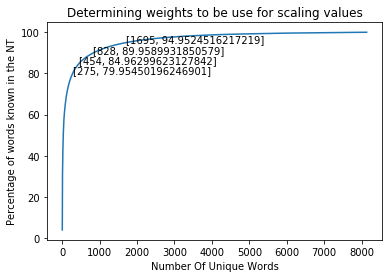

In [5]:
import matplotlib.pyplot as plt
import math
# generate the curve
x_axis = [1]
y_axis = [20753]
for index in range(1,len(freq)):
    x_axis.append(index + 1)
    y_axis.append(freq[index][1] + y_axis[index-1])
    
scaled_y = [(x/y_axis[-1]*100) for x in y_axis]

#
def printPoint(percentage):
    point = []
    for index in range(len(scaled_y)):
        if(round(scaled_y[index],1) == percentage):
            point.append(x_axis[index])
            point.append(scaled_y[index])
            return point
plt.plot(x_axis,scaled_y)
plt.title("Determining weights to be use for scaling values")
plt.xlabel("Number Of Unique Words")
plt.ylabel("Percentage of words known in the NT")
plt.annotate(str(printPoint(80.0)), printPoint(80.0))
plt.annotate(str(printPoint(85.0)), printPoint(85.0))
plt.annotate(str(printPoint(90.0)), printPoint(90.0))
plt.annotate(str(printPoint(95.0)), printPoint(95.0))
plt.show()

In [152]:
#Generate easy reader
easyFreq = []
for index in range(len(freq)):
    easyFreq.append(freq[index][0])
    if(x_axis[index] > printPoint(81.0)[0]): # change this value to generate an easy reader
        break
#rint(printPoint(81.0))        
#print(easyFreq)

versesCopy = verses
print(verses[1])
for word in verses:
    if(word[2] not in easyFreq):
        for index in range(len(versesCopy)-1,-1,-1):
            if(word[0] == versesCopy[index][0]):
                versesCopy.pop(index)
            
#print(versesCopy)

('41_Mat.001.022', 'δὲ', 'δέ', 'then')


In [160]:
print(len(versesCopy))
print(versesCopy[1])
print(len(verses))

allEasyVerses = []
verse = ""
label = ""
englishVerse= ""
for index in range(len(verses)-1): #
    verse = verse + " " + str(verses[index][1]) 
    englishVerse = englishVerse + " " + str(verses[index][3])  
    if(verses[index][0] != verses[index + 1][0]): #if subsequent row is another verse
        allEasyVerses.append((verses[index][0], verse, englishVerse))
        verse = "" 
        englishVerse = ""
        
print(allEasyVerses[1])
easyReader = ""
indexNo = 1
for row in allEasyVerses:
    easyReader =  easyReader + str(indexNo) + ". " + row[0] + "\nGreek Text:\n" + row[1] + "\n\nEnglish Translation:\n" + row[2] + "\n\n"
    indexNo = indexNo + 1

8696
('41_Mat.001.022', 'δὲ', 'δέ', 'then')
8696
('41_Mat.002.021', ' Ὁ δὲ ἐγερθεὶς παρέλαβεν τὸ παιδίον καὶ τὴν μητέρα αὐτοῦ καὶ εἰσῆλθεν εἰς γῆν Ἰσραήλ.¶', ' <the> And having arisen, he took the Child and the mother of Him and entered into [the] land of Israel.')


In [162]:
f = open("easyNTReader.txt","w+",encoding='utf-8')
f.write(str(easyReader))
f.close()

In [164]:
print(printPoint(81.0))

[338, 80.96388087023868]
